# Autoregressive Model
* A linear model, where current period values are a sum of past outcoes multiplied by a numeric factor
$$x_t = C + \phi x_{t-1} + \epsilon_t $$
where $\phi$ is a numeric constant between (-1,1) and $\epsilon$ is called residual, the difference between our prediction for preiod 't' and the correct value.


* Determine how many lags to include
    * More lags -> more complicate -> more coefficients -> Some coefficients may not be significant
    * we rely on ACF and PACF to determine


* AR models work best with stationary data

## 1. Import data and preprocessing

In [40]:
import pandas as pd
import numpy as np
from scipy.stats.distributions import chi2

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
raw_csv_data = pd.read_csv('Index2018.csv')
df_comp = raw_csv_data.copy()
df_comp['date'] = pd.to_datetime(df_comp['date'], dayfirst = True)
df_comp.set_index('date',inplace = True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method ='ffill')

In [15]:
#create a new DataFrame with only ftse data
new_df = pd.DataFrame({'market_value':df_comp['ftse']})
#train test split
train_size = int(len(new_df)*0.8)
df,df_test = new_df.iloc[:train_size],new_df.iloc[train_size:]

## the ACF
Caches both direct and indirect effects from past lags

Text(0.5, 1.0, 'ACF for ftse')

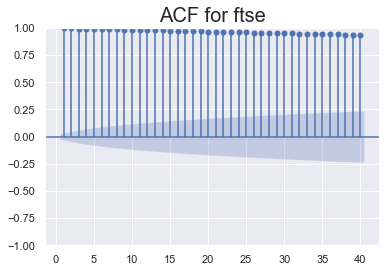

In [17]:
sgt.plot_acf(df['market_value'],zero = False, lags = 40)
plt.title('ACF for ftse', size =20)

## the PACF
The PACF model shows the individual effect each past value has on the current one

Text(0.5, 1.0, 'PACF for ftse')

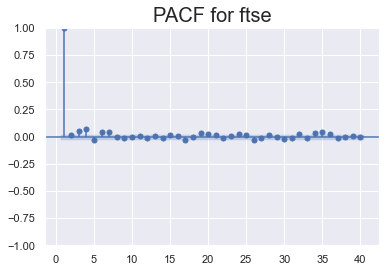

In [18]:
sgt.plot_pacf(df['market_value'],zero = False,alpha = 0.05, lags = 40, method = 'ols')
plt.title('PACF for ftse', size =20)

* the first lag has a much higher coefficient as compared to the others.

* we can see coefficients from 25 lags and onwards are not significant so we can ignore them

## 2. the AR(1) Model
Since the first coefficient is much more significant that the others hence for the first model we only take this into consideration.

$$x_t = C + \phi x_{t-1} + \epsilon_t$$

In [26]:
from  statsmodels.tsa.arima.model import ARIMA

In [29]:
#we set MA (moving average) to be 0 so it's a pure AR model
#order (1,0,0): 1 is the number of past values we wish to incorporate
#             0 means we don't take any residual values into consideration
#             0 means we set MA to be 0
model_ar = ARIMA(df['market_value'],order = (1,0,0))
results_ar = model_ar.fit()
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -27622.604
Date:                Thu, 18 Aug 2022   AIC                          55251.207
Time:                        14:11:12   BIC                          55270.772
Sample:                    01-07-1994   HQIC                         55258.063
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6374    423.329     12.023      0.000    4259.929    5919.346
ar.L1          0.9984      0.001   1147.578      0.000       0.997       1.000
sigma2      3511.3841     40.874     85.907      0.000    3431.272    3591.496
===================================================================================
Ljung-Box (L1) (Q):                   1.51   Jarque-Bera (JB):              3313.33
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 3. higher order AR model
We use a **log-likelihood ratio test** to determine  how many lags should we retain
### 3.1 AR2 model

In [30]:
model_ar2 = ARIMA(df['market_value'],order = (2,0,0))
results_ar2 = model_ar2.fit()
results_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -27621.949
Date:                Thu, 18 Aug 2022   AIC                          55251.898
Time:                        14:36:31   BIC                          55277.984
Sample:                    01-07-1994   HQIC                         55261.039
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    368.251     13.821      0.000    4367.881    5811.400
ar.L1          0.9811      0.010     99.868      0.000       0.962       1.000
ar.L2          0.0171      0.010      1.749      0.080      -0.002       0.036
sigma2      3510.1277     41.037     85.535      0.000    3429.696    3590.560
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3282.81
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 3.2 AR3 Model

In [31]:
model_ar3 = ARIMA(df['market_value'],order = (3,0,0))
results_ar3 = model_ar3.fit()
results_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -27615.962
Date:                Thu, 18 Aug 2022   AIC                          55241.925
Time:                        14:40:40   BIC                          55274.532
Sample:                    01-07-1994   HQIC                         55253.351
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    378.583     13.444      0.000    4347.631    5831.651
ar.L1          0.9802      0.010     99.076      0.000       0.961       1.000
ar.L2         -0.0309      0.013     -2.315      0.021      -0.057      -0.005
ar.L3          0.0489      0.009      5.383      0.000       0.031       0.067
sigma2      3502.2643     41.020     85.379      0.000    3421.866    3582.662
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              3286.97
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 3.3 AR4 Model

In [32]:
model_ar4 = ARIMA(df['market_value'],order = (4,0,0))
results_ar4 = model_ar4.fit()
results_ar4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -27602.680
Date:                Thu, 18 Aug 2022   AIC                          55217.359
Time:                        14:41:38   BIC                          55256.488
Sample:                    01-07-1994   HQIC                         55231.070
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    391.959     12.985      0.000    4321.415    5857.867
ar.L1          0.9767      0.010     97.788      0.000       0.957       0.996
ar.L2         -0.0287      0.013     -2.129      0.033      -0.055      -0.002
ar.L3         -0.0224      0.013     -1.784      0.074      -0.047       0.002
ar.L4          0.0728      0.009      8.033      0.000       0.055       0.091
sigma2      3484.0262     41.922     83.108      0.000    3401.861    3566.191
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3044.18
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 3.4 Log Likelyhood Ratio (LLR) Test  
In general we prefers a model with high log-likelyhood but low information criteria (AIC, BIC, HQIC)

In [61]:
def LLR_test(mod_1,mod_2,df = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR,df).round(3)
    return p

In [62]:
#compare higher lag AR models
LLR_test(model_ar2,model_ar3)

0.001

LLR test shows the difference between AR2 and AR3 is significant and hence we should chose the more complicated model

In [48]:
#test AR3 & AR4
print(results_ar4.summary())
print('LLR test results for AR3& AR4 is : ', LLR_test(model_ar3,model_ar4))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -27602.680
Date:                Thu, 18 Aug 2022   AIC                          55217.359
Time:                        15:04:21   BIC                          55256.488
Sample:                    01-07-1994   HQIC                         55231.070
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    391.959     12.985      0.000    4321.415    5857.867
ar.L1          0.9767      0.010     97.788      0.000       0.957       0.996
ar.L2         -0.0287      0.013     -2.129      0.0

## 3.5 Higher orders
We test on higher order ARs, when it reached 6 both critera are satisfied:
* (1) Non-significant p-value for the LLR test
* (2) Non-significant p-value fort he highest lag coefficient

In [71]:
model_ar5 = ARIMA(df['market_value'],order = (5,0,0))
results_ar5 = model_ar5.fit()

model_ar6 = ARIMA(df['market_value'],order = (5,0,0))
results_ar6 = model_ar6.fit()
print(results_ar6.summary())
print('LLR test results for AR5& AR6 is : ', LLR_test(model_ar5,model_ar6))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -27600.460
Date:                Thu, 18 Aug 2022   AIC                          55214.920
Time:                        17:17:04   BIC                          55260.570
Sample:                    01-07-1994   HQIC                         55230.916
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    386.229     13.178      0.000    4332.647    5846.635
ar.L1          0.9788      0.010     97.867      0.000       0.959       0.998
ar.L2         -0.0293      0.013     -2.176      0.0

In [73]:
#we also check that LR5 is significantly better than AR1
LLR_test(model_ar,model_ar5, df =4)

0.0

# 4. DF-test
DF test suggests a p value of 0.33.
We can't say the data is from a stationary process assuming a 5% significance level. 

This suggest we shouldn't use AR model for accurate forcast

In [77]:
sts.adfuller(df['market_value'])

(-1.9041551418836864,
 0.33010893277028336,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

# 5. Use Returns (instead of Price)
* **return (r) **: the % change between the values for two consecutive periods 
$$r = \frac{P_t- P_{t-1}}{P_{t-1}} $$

* Positive Return: r > 0 
* Negative Return: r < 0



In [79]:
#calculate returns
df['returns'] = df['market_value'].pct_change(1).mul(100)
#remove first row, as we don't have 'return value' for the first
df = df.iloc[1:]
sts.adfuller(df['returns'])

<ipython-input-79-a64e02198200>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df['market_value'].pct_change(1).mul(100)


(-12.770265719497184,
 7.79805833604023e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.7672456975)

Here the p value is -12.77, we can say the process is stationary even at 1% significance 

# 6. ACF and PACF for Returns

Text(0.5, 1.0, 'ACF FTSE Returns')

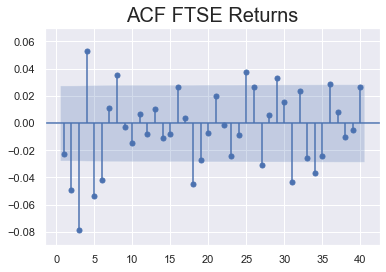

In [83]:
sgt.plot_acf(df['returns'], lags = 40, zero = False)
plt.ylim(-0.09,0.07)
plt.title('ACF FTSE Returns', size = 20)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'PACF FTSE Returns')

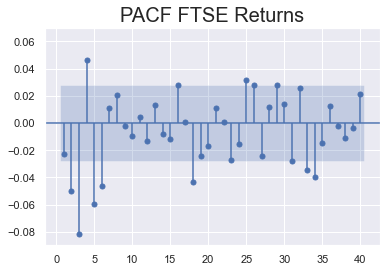

In [84]:
sgt.plot_pacf(df['returns'], lags = 40, zero = False)
plt.ylim(-0.09,0.07)
plt.title('PACF FTSE Returns', size = 20)

# 7. AR(1) for Returns

In [85]:
model_ret_ar1 = ARIMA(df['returns'], order = (1,0,0))
results_ret_ar_1 = model_ret_ar1.fit()
results_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -7929.749
Date:                Thu, 18 Aug 2022   AIC                          15865.497
Time:                        21:23:33   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.143      0.253      -0.013       0.051
ar.L1         -0.0230      0.009     -2.697      0.007      -0.040      -0.006
sigma2         1.3790      0.014    100.092      0.000       1.352       1.406
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7872.72
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

* We see that both variables (const, ar.L1) are not significant at 5% level. 

* Therefore the model holds no real predictive power

# 8. Higher-Lag AR Models for Returns

In [88]:
#we see an AR2 model gives better prediction (in terms of IC, p-value, LLR test) as compared to AR1
model_ret_ar2 = ARIMA(df['returns'], order = (2,0,0))
results_ret_ar_2 = model_ret_ar2.fit()
print(results_ret_ar_2.summary())
LLR_test(model_ret_ar1,model_ret_ar2)

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -7923.456
Date:                Thu, 18 Aug 2022   AIC                          15854.911
Time:                        21:47:58   BIC                          15880.996
Sample:                    01-10-1994   HQIC                         15864.052
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.194      0.233      -0.012       0.050
ar.L1         -0.0242      0.009     -2.799      0.005      -0.041      -0.007
ar.L2         -0.0500      0.008     -6.371      0.0

0.0

In [89]:
#AR3 model
model_ret_ar3 = ARIMA(df['returns'], order = (3,0,0))
results_ret_ar_3 = model_ret_ar3.fit()
print(results_ret_ar_3.summary())
LLR_test(model_ret_ar2,model_ret_ar3)

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -7906.738
Date:                Thu, 18 Aug 2022   AIC                          15823.477
Time:                        21:50:46   BIC                          15856.083
Sample:                    01-10-1994   HQIC                         15834.902
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.272      0.203      -0.010       0.048
ar.L1         -0.0283      0.009     -3.199      0.001      -0.046      -0.011
ar.L2         -0.0521      0.008     -6.684      0.0

0.0

* Information criteria are lower again
* p values for all L parameters are significant at 5% level. 
* Also LLR test suggests this model is better than the previous one at 5% significant level

...

* We continue the process until we get a model that:
    * (1) the additional coefficient is insignificant
    * (2) The LLR test fails
    * (3) Higher Information Value (AIC or BIC)
    
* This happened when we moved to AR7 model, hence we opt for the simpler model (AR6)


In [111]:
#AR6 model
model_ret_ar6 = ARIMA(df['returns'], order = (6,0,0))
results_ret_ar_6 = model_ret_ar6.fit()

# 8. Normalisation
* Everything in the sample space is normalised to the first value in the set.

* We normalise the returns, whcih account for the absolute profitability of the investment in contrast to prices.

* It also allows us to compare the relative profitability

In [91]:
benchmark = df['returns'].iloc[0]
df['norms'] = df['returns'].div(benchmark).mul(100)

<ipython-input-91-910303b0e650>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norms'] = df['returns'].div(benchmark).mul(100)


In [92]:
#run adfuller method to check if data is stationary
sts.adfuller(df['norms'])

(-12.770265719497244,
 7.798058336037938e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 80114.49116124898)

The test statistic (-12.77) is much lower than criterion for 1% significance level.    
Therefore we can confirm that the data remains stationary.

# 9. Normalised Returns
We work with AR6 model as normalisation does not change model gradients

In [108]:
model_norm_ret_ar_6 = ARIMA(df['norms'], order = (6,0,0))
results_norm_ret_ar_6 = model_norm_ret_ar_6.fit()
results_norm_ret_ar_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  norms   No. Observations:                 5020
Model:                 ARIMA(6, 0, 0)   Log Likelihood              -40308.940
Date:                Thu, 18 Aug 2022   AIC                          80633.880
Time:                        22:35:20   BIC                          80686.050
Sample:                    01-10-1994   HQIC                         80652.161
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9731      9.123     -1.312      0.189     -29.854       5.908
ar.L1         -0.0245      0.009     -2.639      0.008      -0.043      -0.006
ar.L2         -0.0523      0.008     -6.501      0.000      -0.068      -0.037
ar.L3         -0.0870      0.008    -10.846      0.000      -0.103      -0.071
ar.L4          0.0424      0.008      5.130      0.000       0.026       0.059
ar.L5         -0.0607      0.008     -7.562      0.000      -0.076      -0.045
ar.L6         -0.0466      0.009     -5.213      0.000      -0.064      -0.029
sigma2      5.524e+05   5975.606     92.451      0.000    5.41e+05    5.64e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6487.31
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 10. Residual ($\epsilon_t$)
* Examine a summary of their statistics

* Test for stationarity

* Plot the values

In [95]:
df['res_price'] = results_ar5.resid
print('The mean of res_price is ', df['res_price'].mean())
print('The variance of res_price is ', df['res_price'].var())

The mean of res_price is  0.6242928514258322
The variance of res_price is  3479.7745339960857


<ipython-input-95-399702691efa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_price'] = results_ar5.resid


The high variance is because AR model do not work well on non-stationary data

In [96]:
# run adfuller test to check stationarity 
sts.adfuller(df.res_price)

(-31.171969073916692,
 0.0,
 5,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54843.42490425666)

Text(0.5, 1.0, 'ACF of Residuals for Price')

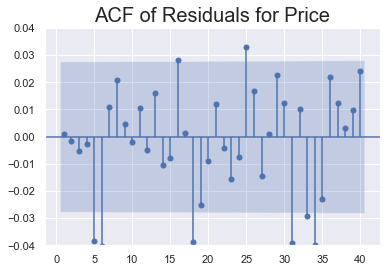

In [99]:
#plot the results
sgt.plot_acf(df['res_price'],zero = False, lags = 40)
plt.ylim(-0.04,0.04)
plt.title('ACF of Residuals for Price',size =20)

We see most lags fall within the blue rectangle and hence their coefficients are close to zero/not significant

Text(0.5, 1.0, 'Residuals of Prices')

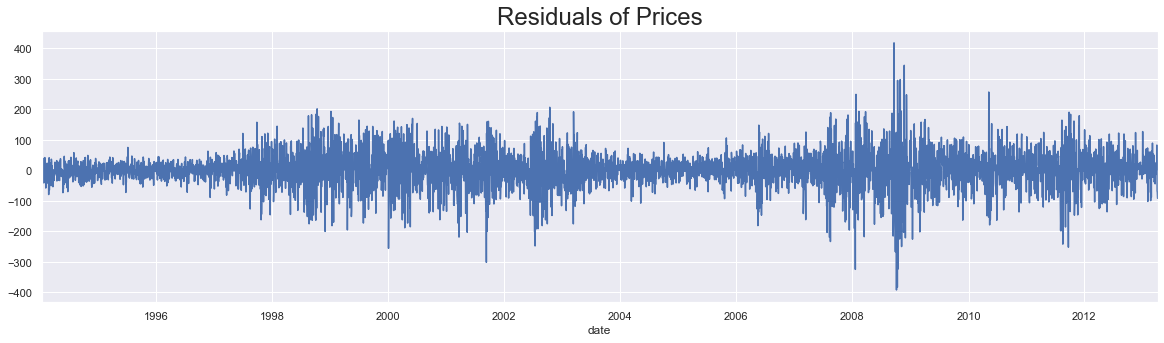

In [100]:
#confirm res_price resembles white noise
df['res_price'][1:].plot(figsize = (20,5))
plt.title('Residuals of Prices', size = 24)

## 10.1 Residuals for  normalised returns

In [114]:
df['res_ret'] = results_ret_ar_6.resid
print('The mean of res_price is ', df['res_ret'].mean())
print('The variance of res_price is ', df['res_ret'].var())

The mean of res_price is  -4.8530419394304825e-05
The variance of res_price is  1.3559802128715168


In [115]:
#ADfuller test to ensure the data is stationary
sts.adfuller(df['res_ret'])

(-70.78411835673874,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15692.570807333197)

Text(0.5, 1.0, 'ACF of Residuals for Returns')

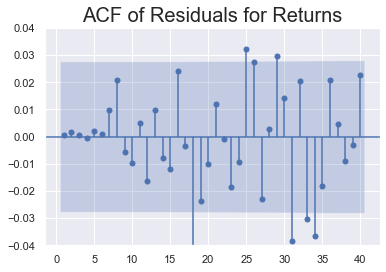

In [116]:
#plot the results
sgt.plot_acf(df['res_ret'],zero = False, lags = 40)
plt.ylim(-0.04,0.04)
plt.title('ACF of Residuals for Returns',size =20)

Text(0.5, 1.0, 'Residuals of Returns')

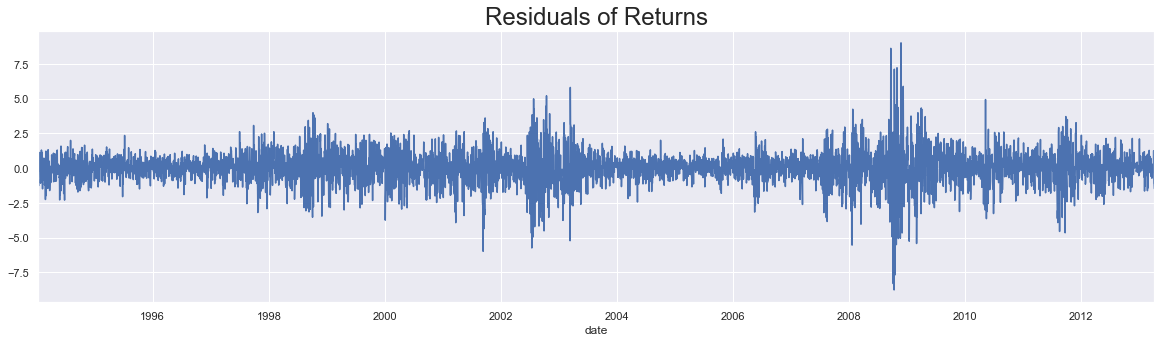

In [117]:
#confirm res_price resembles white noise
df['res_ret'][1:].plot(figsize = (20,5))
plt.title('Residuals of Returns', size = 24)